###  projected gradient を使った negative dual Lagrange function の実装

In [18]:
import numpy as np
import matplotlib.pyplot as plt 

### Toy Dataset の生成 

In [19]:
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n,2)
y = 2 * (omega * x[:,0] + x[:,1] + noise >0) - 1

### negative dual Lagrange function の実装

In [20]:
class DualLagrange:
    """
    L(K,alpha)            : 双対ラグランジュ関数の計算
    Loss_regularization(w): hingeロスと正則化項の合計
    update_w(alpha)　　　 : wの更新
    update_alpha(K,alpha) : alphaの更新
    training()            : 学習
    """
    def __init__(self, x, y, step = 0.01, lamda = 0.01, loop = 50):
        self.x = x
        self.y = y
        self.step = step
        self.lamda = lamda
        self.loop = loop
    
    def L(self, K, alpha):
        return -1/(4 * self.lamda) * alpha.T.dot(K).dot(alpha) + sum(alpha)
    
    def Loss_regularization(self, w):
        t = 1 - self.y * self.x.dot(w)
        return np.sum(list(map(lambda x:0 if x<0 else x, t))) + self.lamda * w.dot(w)
    
    def update_w(self, alpha):
        return 1/(2 * self.lamda) * np.sum(alpha * self.y * self.x.T, axis = 1)
    
    def update_alpha(self, K, alpha):
        a = alpha - self.step * (1/(2*self.lamda)* K.dot(alpha) - np.ones(len(alpha)))
        return np.array(list(map(lambda x:1 if x>1 else(0 if x<0 else x), a)))
    
    def training(self):
        L_list = []
        Lr_list = []
        self.x = np.hstack((self.x, np.ones(self.x.shape[0]).reshape(-1,1)))
        alpha = np.zeros(self.x.shape[0])
        K = (self.x.T * self.y).T.dot(self.x.T * self.y)
        for i in range(self.loop):
            L_list.append(self.L(K,alpha))
            w = self.update_w(alpha)
            Lr_list.append(self.Loss_regularization(w))
            alpha = self.update_alpha(K,alpha)
        
        return L_list, Lr_list

### パラメータの設定

In [21]:
step, lamda, loop = 0.01, 1, 500

### 実行 

In [22]:
clr = DualLagrange(x,y,step = step,lamda = lamda, loop = loop)
L_list, Lr_list = clr.training()

### グラフのプロット 

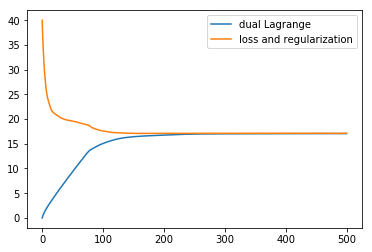

In [23]:
t = np.arange(loop)

p1 = plt.plot(t,L_list)
p2 = plt.plot(t,Lr_list)
plt.legend((p1[0],p2[0]),("dual Lagrange","loss and regularization"))
plt.show()